# 🎬 Final Project Notebook

### **Team Name:**  
> *JigglySeal Data Analysis*

### **Project Title:**  
> Scripted Shadows An analysis of the key creative forces in film and the hidden patterns among cast and genre choices.

### **Dataset:**  
`imdbData.csv` - A dataset of 5,000 top IMDb-rated films, including metadata such as title, release year, rating, vote count, runtime, genres, director, and writer info.


---

# Final Presentation Link

https://docs.google.com/presentation/d/1vxOZv0HIJ4RytWIikG1SYDxhZZOIjQp_aDxvx_auzTE/edit?usp=sharing

---

### 🧠 Research Questions

**Main Question:**  
- What writers and directors are most likely to appear on the IMDb Top 5000 list?

**Related Questions:**  
1. Which directors tend to get the best average rating?
2. what is the most uncommon genre?


In [1]:
%pip install tpot


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import re
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from tpot import TPOTRegressor
from scipy.cluster.hierarchy import dendrogram, linkage
import importlib.util
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# Load the cleaned data
df = pd.read_csv("imdbData.csv")
df.head()


/home/jupyter-harrowerj/venv/lib/python3.12/site-packages/stopit/__init__.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/home/jupyter-harrowerj/venv/lib/python3.12/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0111161,The Shawshank Redemption,1994,1,9.3,3031615,142,Frank Darabont,"Stephen King, Frank Darabont",Drama,"<a href=""https://www.imdb.com/title/tt0111161""...","<a href=""https://www.imdb.com/title/tt0111161""..."
1,tt0068646,The Godfather,1972,2,9.2,2116141,175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Crime, Drama","<a href=""https://www.imdb.com/title/tt0068646""...","<a href=""https://www.imdb.com/title/tt0068646""..."
2,tt0468569,The Dark Knight,2008,3,9.0,3008129,152,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...","Action, Crime, Drama","<a href=""https://www.imdb.com/title/tt0468569""...","<a href=""https://www.imdb.com/title/tt0468569""..."
3,tt0167260,The Lord of the Rings: The Return of the King,2003,4,9.0,2070242,201,Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens, P...","Adventure, Drama, Fantasy","<a href=""https://www.imdb.com/title/tt0167260""...","<a href=""https://www.imdb.com/title/tt0167260""..."
4,tt0108052,Schindler's List,1993,5,9.0,1516877,195,Steven Spielberg,"Thomas Keneally, Steven Zaillian","Biography, Drama, History","<a href=""https://www.imdb.com/title/tt0108052""...","<a href=""https://www.imdb.com/title/tt0108052""..."


In [3]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           5000 non-null   object 
 1   primaryTitle     5000 non-null   object 
 2   startYear        5000 non-null   int64  
 3   rank             5000 non-null   int64  
 4   averageRating    5000 non-null   float64
 5   numVotes         5000 non-null   int64  
 6   runtimeMinutes   5000 non-null   int64  
 7   directors        5000 non-null   object 
 8   writers          4974 non-null   object 
 9   genres           5000 non-null   object 
 10  IMDbLink         5000 non-null   object 
 11  Title_IMDb_Link  5000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 468.9+ KB


In [4]:
df.describe(include='all')

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
count,5000,5000,5000.000000,5000.000000,5000.00000,5.000000e+03,5000.000000,5000,4974,5000,5000,5000
unique,5000,4909,NaN,NaN,NaN,NaN,NaN,2279,4373,360,5000,5000
top,tt5177088,Les Misérables,NaN,NaN,NaN,NaN,NaN,Woody Allen,Woody Allen,"Comedy, Drama, Romance","<a href=""https://www.imdb.com/title/tt5177088""...","<a href=""https://www.imdb.com/title/tt5177088""..."
freq,1,3,NaN,NaN,NaN,NaN,NaN,40,33,229,1,1
mean,NaN,NaN,2002.027200,2500.500000,7.13748,1.631401e+05,114.555400,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,18.263854,1443.520003,0.59682,2.405592e+05,23.216182,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1915.000000,1.000000,5.90000,2.500800e+04,25.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1994.000000,1250.750000,6.70000,4.009625e+04,99.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2007.000000,2500.500000,7.10000,7.445850e+04,111.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2015.000000,3750.250000,7.60000,1.782750e+05,126.000000,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

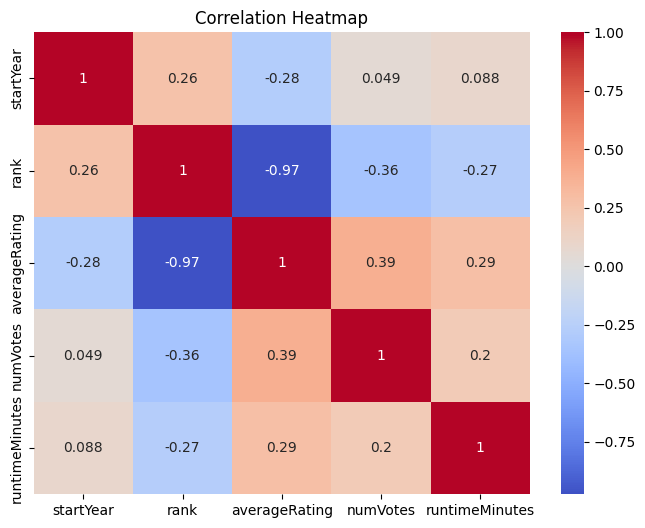

In [6]:
corr = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

##  Data Description

- **Rows:** 5,000 movies  
- **Columns:** 12 attributes including title, year, rating, votes, runtime, genres, director, and writer  
- **Time Span:** 1915 to 2025  
- **Rating Range:** 5.9 to 9.3  
- **Votes Range:** 25,008 to 3,031,615  
- **Runtime:** 25 to 374 minutes  
- **Genres:** Most common = `Comedy, Drama, Romance`

---

##  Missing Data & Outliers

- `writers`:  26 missing entries still present  
- No duplicate rows  
- **Potential outliers:**
  - 4 films have a runtime longer than 300 minutes  
  - 1 film has a rating below 6.0



starting off by setting up kmeans and the scaler

In [7]:
kmeandf = df[['startYear', 'averageRating', 'numVotes', 'runtimeMinutes']]

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(kmeandf)

run kmeans and put the results in a list to be plotted

In [9]:
inertia = []
k_range = range(2, 16)  # Testing k from 2 to 16

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=101)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

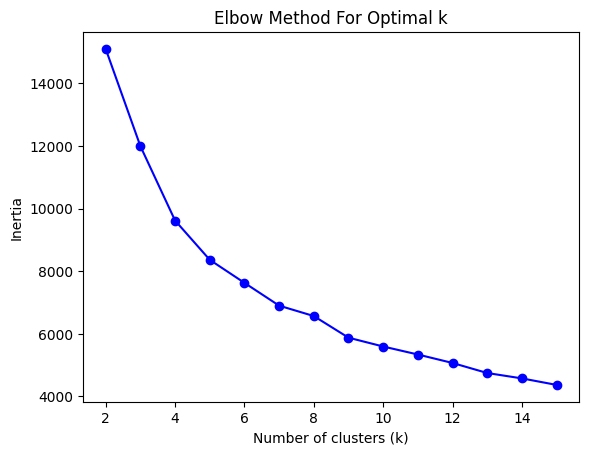

In [10]:
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

make silhoutte scores as well and plot them similarly

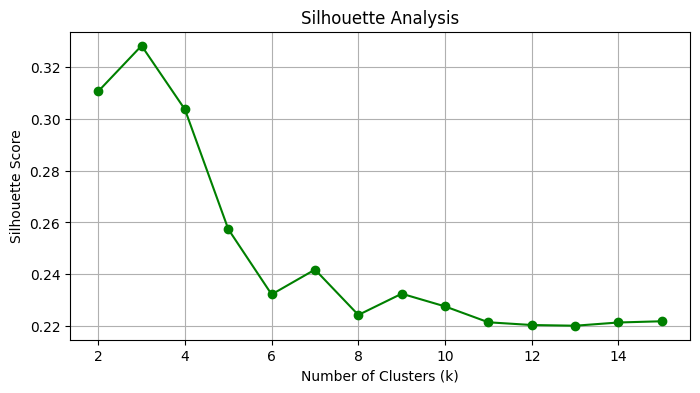

In [11]:
silhouette_scores = []

# Loop through k values from 2 to 16
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=101)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 16), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

reduce dimensions and plot final analysis

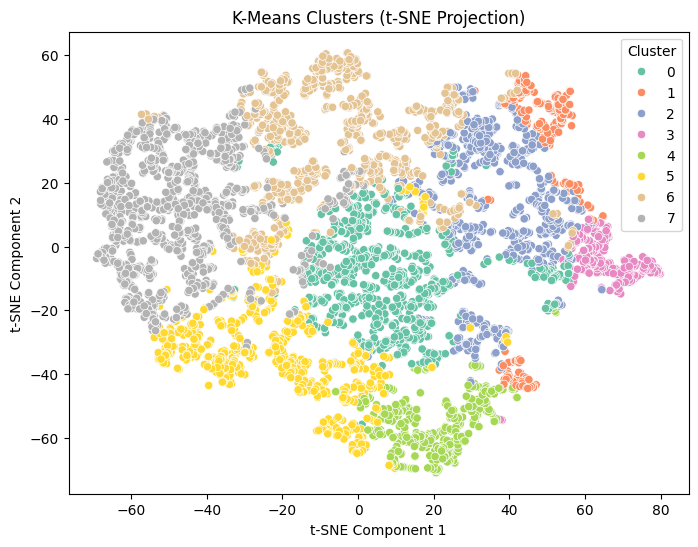

In [12]:
kmeans = KMeans(n_clusters=8, random_state=101)
y_kmeans = kmeans.fit_predict(scaled_features)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=y_kmeans, palette='Set2')
plt.title("K-Means Clusters (t-SNE Projection)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title='Cluster')
plt.show()

In [13]:
df_clustered = df.copy()
df_clustered['cluster'] = y_kmeans


In [14]:
cluster_means = df_clustered.groupby('cluster').mean(numeric_only=True)
print(cluster_means)

           startYear         rank  averageRating      numVotes  runtimeMinutes
cluster                                                                       
0        2007.667064  1679.442721       7.430668  1.445606e+05       98.848449
1        2001.042194  1196.126582       7.719831  1.269868e+05      175.552743
2        2007.525622  1151.814056       7.636164  1.965302e+05      129.597365
3        2004.062222   444.582222       8.056889  1.020217e+06      131.560000
4        1958.212658  1054.162025       7.783038  9.610493e+04      106.518987
5        1986.511765  3132.400000       6.855882  7.478247e+04      105.776471
6        2013.015169  3389.682614       6.793932  1.425610e+05      125.924154
7        2010.999078  4123.079263       6.492074  8.266862e+04       99.815668


a handful of clusters stick out  such as cluster 3 being very low rank proportionally and having a lions share of the votes, surprised to not see more clustering around runtime, 

## Linear Regression

In [15]:
features = ['numVotes', 'runtimeMinutes', 'startYear']
target = 'averageRating'
df_clean = df[features + [target]].dropna()

# Extract X and y
X = df_clean[features].values
y = df_clean[target].values.reshape(-1, 1)

# Normalize features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

In [16]:
# Fit the regression model
model = LinearRegression()
model.fit(X_norm, y)

# Predict
y_pred = model.predict(X_norm)

In [17]:
# sqrt of mse to get rmse and print
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse:.4f}")

# calculate coeffecients and intercepts with scikit to make it easier
print("Intercept:", model.intercept_)
#prints out coeffeciencts for each value we are trying to predict off of
print("Coefficients:", model.coef_)


RMSE: 0.5016
Intercept: [7.13748]
Coefficients: [[ 0.21088075  0.14529577 -0.18771062]]


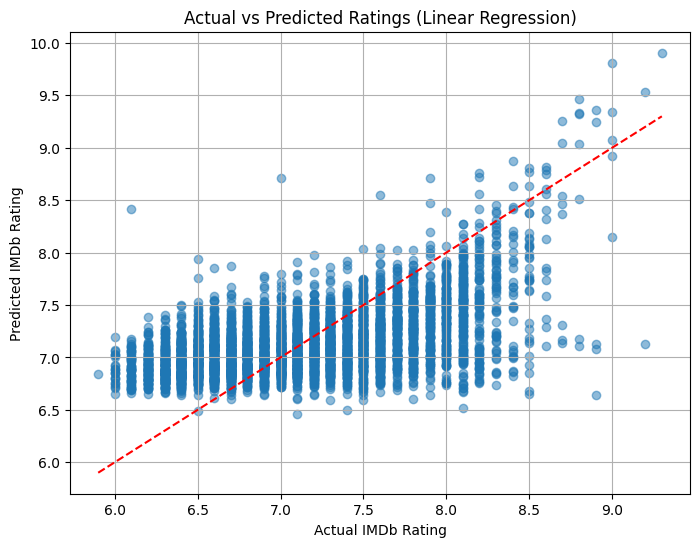

In [18]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual IMDb Rating')
plt.ylabel('Predicted IMDb Rating')
plt.title('Actual vs Predicted Ratings (Linear Regression)')
plt.grid(True)
plt.show()

Our model doesn't do the worst job with most of the points being within .5 of their predicted rating which isn't that bad on a 10 point scale but it is more practically a 6-10 scale which is much worse I think that other features may be better indicators for ratings, however we might not be able to plot them at least with these methods because they are not numerical, also a non linear line may make for a better fit as we can see it is almost horizontal from 6-7.5 in actual imdb rating and then goes up from there

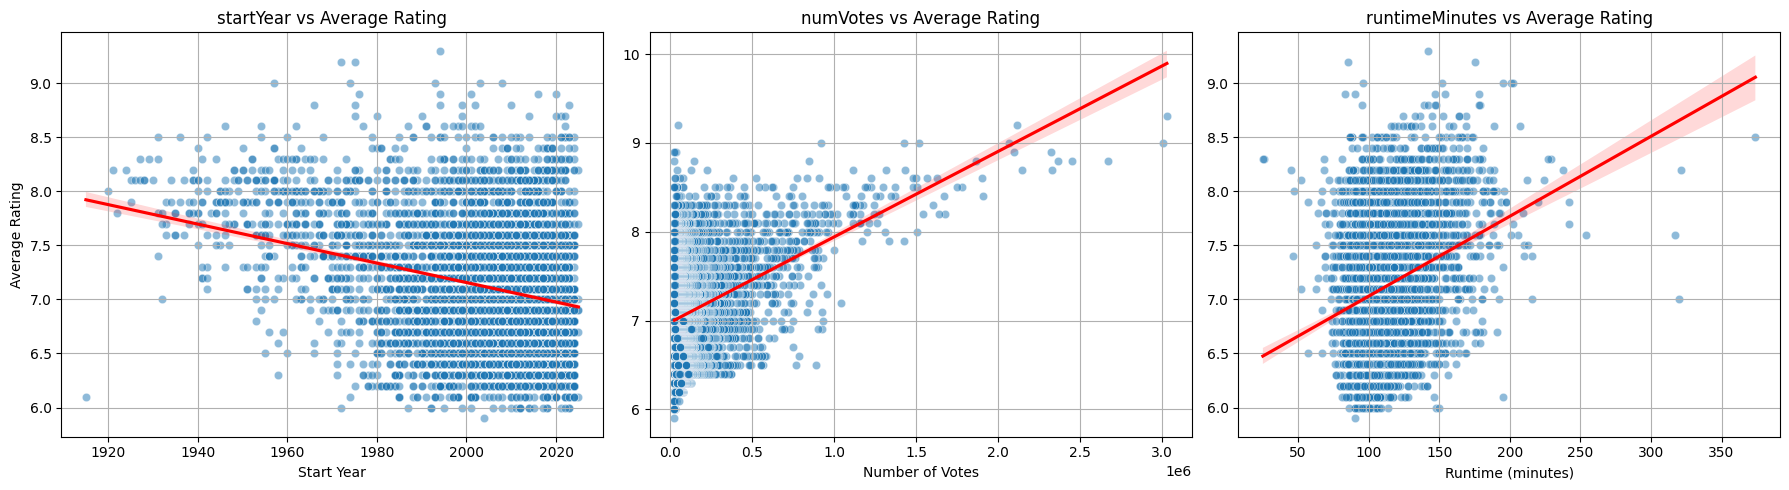

In [19]:
# Set up 3 side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. startYear vs averageRating
sns.scatterplot(x='startYear', y='averageRating', data=df, alpha=0.5, ax=axes[0])
sns.regplot(x='startYear', y='averageRating', data=df, scatter=False, color='red', ax=axes[0])
axes[0].set_title('startYear vs Average Rating')
axes[0].set_xlabel('Start Year')
axes[0].set_ylabel('Average Rating')
axes[0].grid(True)

# 2. numVotes vs averageRating
sns.scatterplot(x='numVotes', y='averageRating', data=df, alpha=0.5, ax=axes[1])
sns.regplot(x='numVotes', y='averageRating', data=df, scatter=False, color='red', ax=axes[1])
axes[1].set_title('numVotes vs Average Rating')
axes[1].set_xlabel('Number of Votes')
axes[1].set_ylabel('')
axes[1].grid(True)

# 3. runtimeMinutes vs averageRating
sns.scatterplot(x='runtimeMinutes', y='averageRating', data=df, alpha=0.5, ax=axes[2])
sns.regplot(x='runtimeMinutes', y='averageRating', data=df, scatter=False, color='red', ax=axes[2])
axes[2].set_title('runtimeMinutes vs Average Rating')
axes[2].set_xlabel('Runtime (minutes)')
axes[2].set_ylabel('')
axes[2].grid(True)

plt.tight_layout()
plt.show()

linear correlations of our 3 numerical values

In [20]:
corr_start = df['startYear'].corr(df['averageRating'])
corr_votes = df['numVotes'].corr(df['averageRating'])
corr_runtime = df['runtimeMinutes'].corr(df['averageRating'])

print(f"Pearson Correlation (startYear vs averageRating): {corr_start:.3f}")
print(f"Pearson Correlation (numVotes vs averageRating): {corr_votes:.3f}")
print(f"Pearson Correlation (runtimeMinutes vs averageRating): {corr_runtime:.3f}")

Pearson Correlation (startYear vs averageRating): -0.276
Pearson Correlation (numVotes vs averageRating): 0.387
Pearson Correlation (runtimeMinutes vs averageRating): 0.287


---

As we can see by the correlations for each feature to averageRating, there is some relationship between the statistics however none of them is a particularly strong linear relationship with numVotes having the strongest one and going down hill from there.

big old pair plot to try and find any strong correlations

---

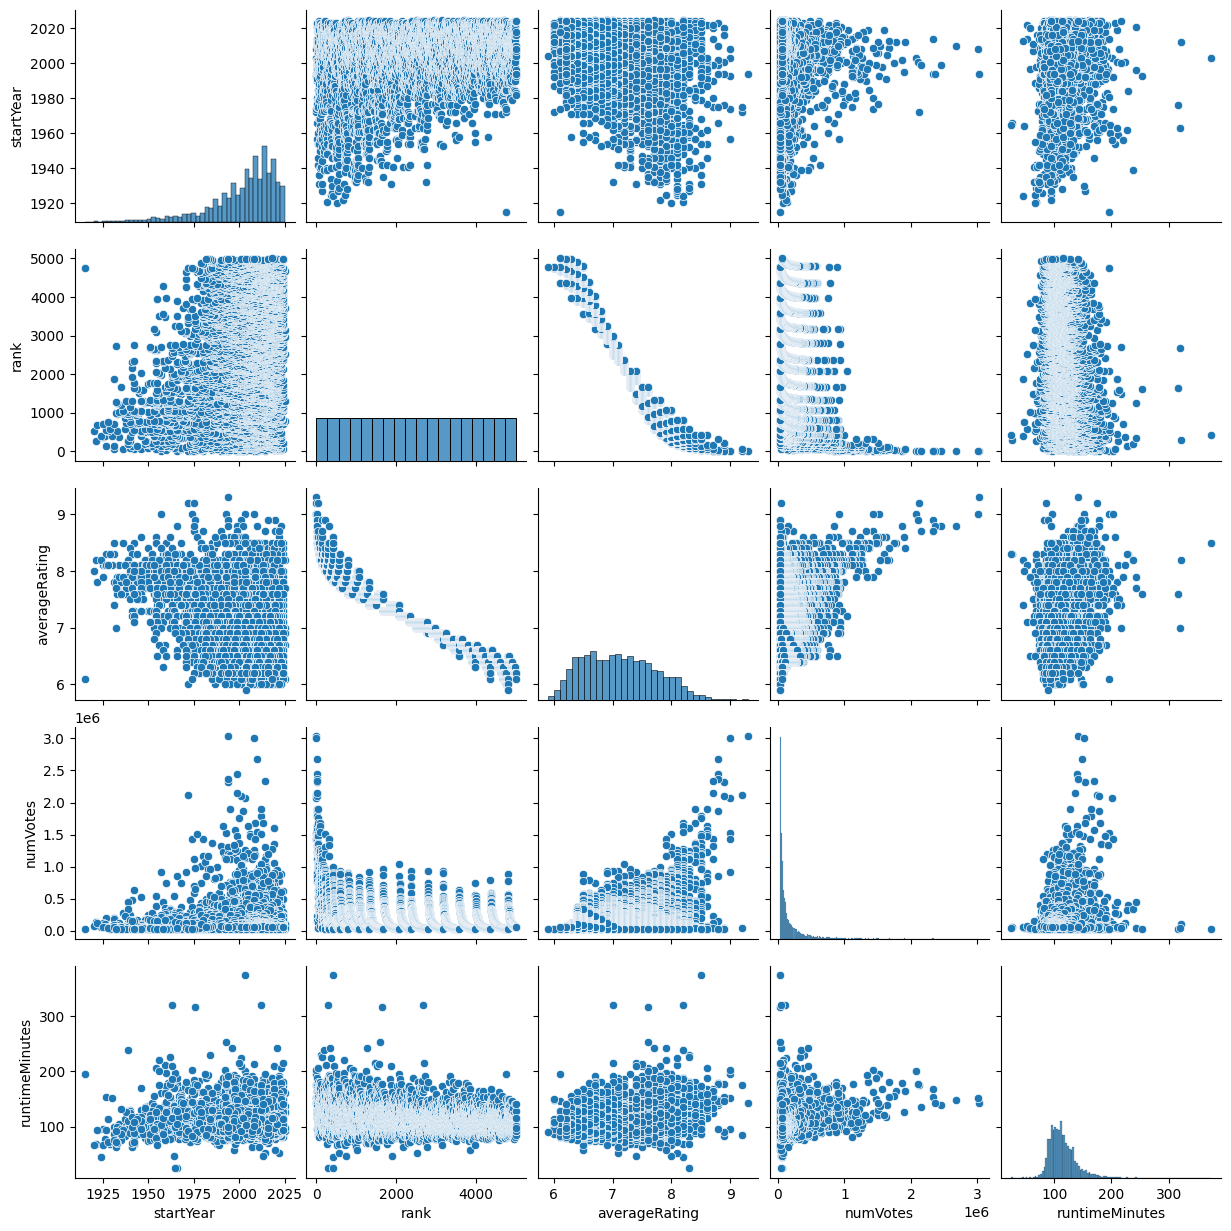

In [21]:
sns.pairplot(df)

In [22]:
correlation = df['startYear'].corr(df['averageRating'])
print(f"Pearson Correlation (startYear vs averageRating): {correlation:.3f}")

Pearson Correlation (startYear vs averageRating): -0.276


did not really find any particularly strong correlations

I wanted to find out which directors had the highest average ratings

In [23]:
df_q1 = df[df['numVotes'] >= 100]

# Handle multiple directors by splitting on comma
df_q1['directors'] = df_q1['directors'].astype(str)
df_exploded = df_q1.assign(directors=df_q1['directors'].str.split(',')).explode('directors')

# Group by director and calculate average rating and number of movies
director_stats = df_exploded.groupby('directors').agg(
    avg_rating=('averageRating', 'mean'),
    num_movies=('primaryTitle', 'count')
).reset_index()

# Sort directors by average rating descending
top_directors = director_stats.sort_values(by='avg_rating', ascending=False)

# Display top 10 directors
top_directors.head(10)

,directors,avg_rating,num_movies
965,Ertem Egilmez,9.0,2
478,Amitabh Reza Chowdhury,8.9,1
1494,Kartal Tibet,8.9,1
435,Alastair Fothergill,8.9,1
210,Keith Scholey,8.9,1
198,Jonathan Hughes,8.9,1
2457,Vidhu Vinod Chopra,8.8,1
2327,Sudha Kongara,8.7,1
1533,Kiranraj K,8.7,1
1186,Irvin Kershner,8.7,1


---

I did not consider that 2 movies would be the highest on this list so I also decided to filter for directors who directed at least 3 movies

code to find top directors with at least 3 movies directed

--

In [24]:
director_stats = director_stats[director_stats['num_movies'] >= 3]

top_directors = director_stats.sort_values(by='avg_rating', ascending=False)

top_directors.head(10)

,directors,avg_rating,num_movies
691,Charles Chaplin,8.300000,6
2231,Sergio Leone,8.216667,6
1022,Fritz Lang,8.166667,3
745,Christopher Nolan,8.166667,12
426,Akira Kurosawa,8.141667,12
1948,Pete Docter,8.125000,4
1002,Frank Capra,8.100000,5
230,Lee Unkrich,8.066667,3
1185,Ingmar Bergman,8.022222,9
608,Billy Wilder,8.020000,10


Code section to find least common genres, had to split on , to properly read from cells with multiple genres

In [25]:
df_q2 = df.dropna(subset=['genres'])

# Step 4: Handle multiple genres (if multiple genres are comma-separated)
df_q2['genres'] = df_q2['genres'].astype(str)

# Step 5: Split the genres by comma (',') and explode into separate rows
df_q2_exploded = df_q2.assign(genres=df_q2['genres'].str.split(',')).explode('genres')

# Step 6: Strip any leading/trailing spaces from genre names
df_q2_exploded['genres'] = df_q2_exploded['genres'].str.strip()

# Step 7: Count the frequency of each genre
genre_counts = df_q2_exploded['genres'].value_counts()

# Step 8: Get the 5 least common genres
least_common_genres = genre_counts.nsmallest(5)

# Step 9: Display the result
print("The 5 least common genres are:")
print(least_common_genres)

The 5 least common genres are:
genres
News            2
Film-Noir      27
Western        58
Musical        65
Documentary    77
Name: count, dtype: int64


almost identical to above, just most common now instead

In [26]:
# Step 3: Drop rows with missing genre data
df_q3 = df.dropna(subset=['genres'])

# Step 4: Handle multiple genres (if multiple genres are comma-separated)
df_q3['genres'] = df_q3['genres'].astype(str)

# Step 5: Split the genres by comma (',') and explode into separate rows
df_q3_exploded = df_q3.assign(genres=df_q3['genres'].str.split(',')).explode('genres')

# Step 6: Strip any leading/trailing spaces from genre names
df_q3_exploded['genres'] = df_q3_exploded['genres'].str.strip()

# Step 7: Count the frequency of each genre
genre_counts = df_q3_exploded['genres'].value_counts()

# Step 8: Get the 5 most common genres
most_common_genres = genre_counts.nlargest(5)

# Step 9: Display the result
print("The 5 most common genres are:")
print(most_common_genres)

The 5 most common genres are:
genres
Drama        3136
Comedy       1640
Action       1129
Crime        1112
Adventure     917
Name: count, dtype: int64


# Lab 8 Section

---

upgrade tpot in addition to the install above at the very top, might be redundant but im still getting version errors

In [27]:
%pip install --upgrade tpot


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


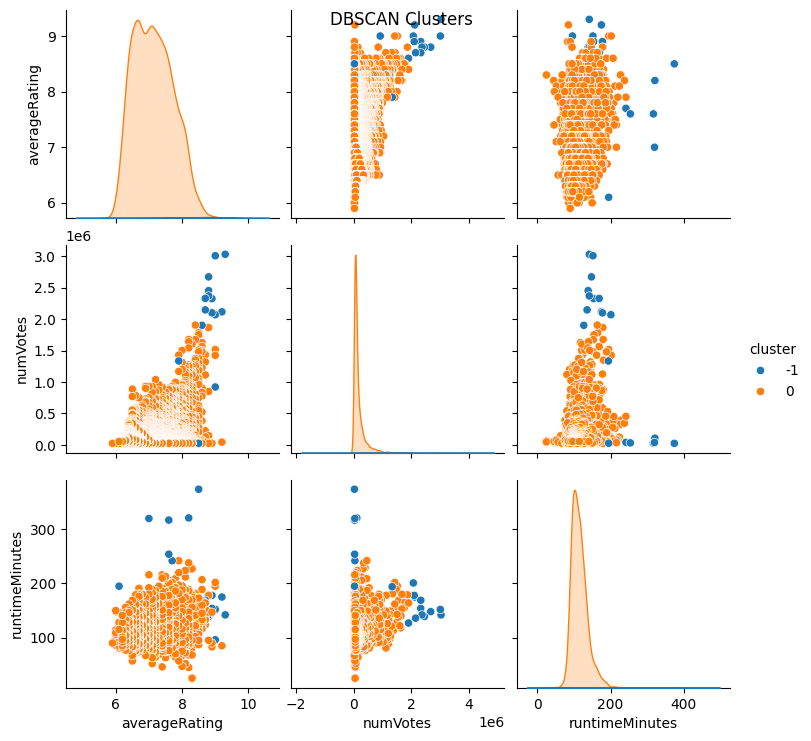

In [28]:
# re-setup dataframe just to get a clean slate
df = pd.read_csv("imdbData.csv")

# Select numeric features for clustering
features = ['averageRating', 'numVotes', 'runtimeMinutes']
X = df[features].dropna()

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run DBSCAN
db = DBSCAN(eps=1.0, min_samples=5).fit(X_scaled)
labels = db.labels_

# Visualize
X['cluster'] = labels
sns.pairplot(X, hue='cluster', palette='tab10')
plt.suptitle("DBSCAN Clusters")
plt.show()


In [29]:
# Prepare dataset
X = df[['numVotes', 'runtimeMinutes']].dropna()
y = df.loc[X.index, 'averageRating']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Run TPOT
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# Evaluate
score = tpot.score(X_test, y_test)
print("R^2 Score on Test Set:", score)

# Export pipeline
tpot.export('tpot_imdb_pipeline.py')

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


/home/jupyter-harrowerj/venv/lib/python3.12/site-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/home/jupyter-harrowerj/venv/lib/python3.12/site-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


                                                                             
Generation 1 - Current best internal CV score: -0.2773054146450543
                                                                             
Generation 2 - Current best internal CV score: -0.27624797530168504
                                                                             
Generation 3 - Current best internal CV score: -0.27452267892711585
                                                                              
Generation 4 - Current best internal CV score: -0.27375945893425124
                                                                              
Generation 5 - Current best internal CV score: -0.27375945893425124
                                                                              
Best pipeline: AdaBoostRegressor(ExtraTreesRegressor(RidgeCV(input_matrix), bootstrap=False, max_features=0.2, min_samples_leaf=17, min_samples_split=19, n_estimators=100), learning_rate=0.0

/home/jupyter-harrowerj/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


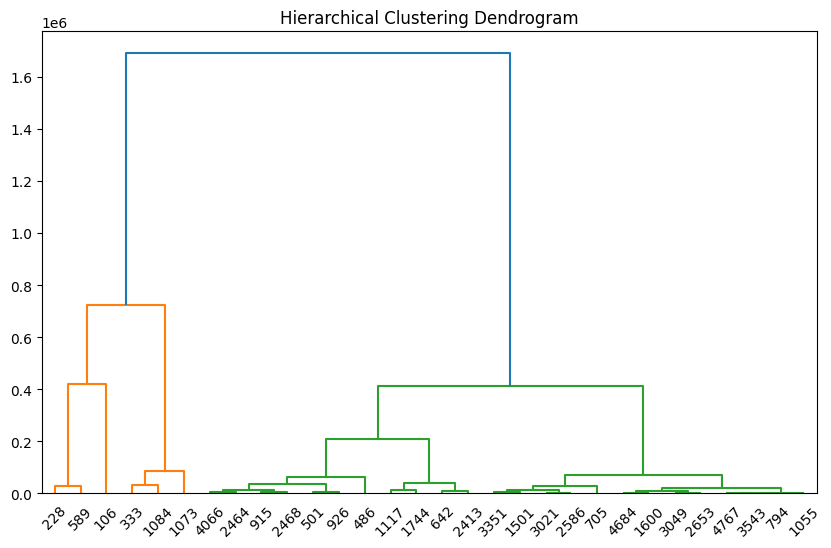

In [30]:
# Sample for readability
sample_df = df[['averageRating', 'numVotes', 'runtimeMinutes']].dropna().sample(n=30, random_state=42)
linked = linkage(sample_df, 'ward')

# Plot
plt.figure(figsize=(10, 6))
dendrogram(linked,
           labels=sample_df.index,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

---

so thats certainly a dendrogram, it seemed to split up into the 2 really distinct clusters, the numbers at the bottom represent the indices of that movie in the original dataframe so 228 for example would be the movie at index 228 from the original dataframe, this model has an r^2 of -0.29338293249070485, which is comically bad, meaning it is 30% worse at predicting than if you just predicted the mean for everything

lets see if we can improve on that by adding some more features and doing some better cleaning on the numbers already there

---

In [31]:
df3 = pd.read_csv("imdbData.csv")
# log transform to hopefully correct for skewed data
df3['logVotes'] = np.log1p(df3['numVotes'])
df3['logRuntime'] = np.log1p(df3['runtimeMinutes'])

if 'startYear' in df3.columns:
    df3['decade'] = (df3['startYear'] // 10) * 10

# use log features now and also use decade to hopefully group around
features = ['logVotes', 'logRuntime']
if 'decade' in df3.columns:
    features.append('decade')

# add target
features.append('averageRating')

# Drop NaNs
df3_clean = df3[features].dropna()

#make x and y
X = df3_clean.drop(columns='averageRating')
y = df3_clean['averageRating']

# One-hot encode categorical features 
X = pd.get_dummies(X, drop_first=True)

# train/test 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# TPOT Regression 
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# output
score = tpot.score(X_test, y_test)
print("Improved R² Score on Test Set:", score)

tpot.export('tpot_imdb_improved_pipeline.py')


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


/home/jupyter-harrowerj/venv/lib/python3.12/site-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/home/jupyter-harrowerj/venv/lib/python3.12/site-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


                                                                             
Generation 1 - Current best internal CV score: -0.23652862419058004
                                                                             
Generation 2 - Current best internal CV score: -0.23652862419058004
                                                                             
Generation 3 - Current best internal CV score: -0.23652862419058004
                                                                              
Generation 4 - Current best internal CV score: -0.23652862419058004
                                                                              
Generation 5 - Current best internal CV score: -0.23652862419058004
                                                                              
Best pipeline: RandomForestRegressor(ElasticNetCV(input_matrix, l1_ratio=0.75, tol=0.01), bootstrap=True, max_features=0.4, min_samples_leaf=16, min_samples_split=14, n_estimators=100)
Impr

/home/jupyter-harrowerj/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


---

### r^2 = -0.24475944911467917, 5 percent better is making me real sad, there is probably something deeply wrong with my approach to be getting results that bad but i'm at a loss for how i can correct it, maybe the seed was just comically bad or something

---

### use the improved pipeline and graph it

/home/jupyter-harrowerj/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


TPOT Best Model – R² Score: 0.3477740817159649
TPOT Best Model – Mean Squared Error: 0.24475944911467917
TPOT Best Model – Root Mean Squared Error: 0.4947316940672784


/home/jupyter-harrowerj/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


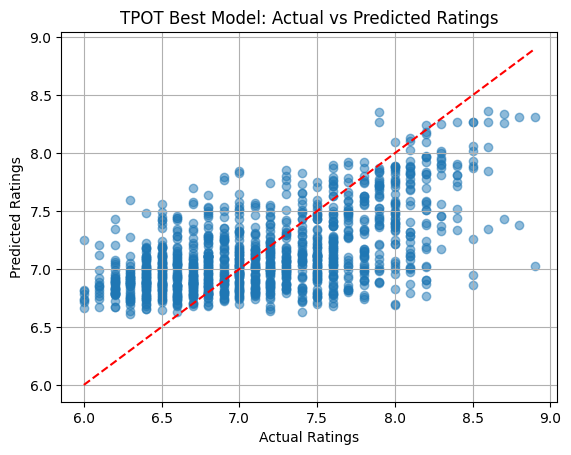

In [32]:
tpot_pipeline = make_pipeline(
    StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.75, tol=0.01)),
    RandomForestRegressor(
        bootstrap=True,
        max_features=0.4,
        min_samples_leaf=16,
        min_samples_split=14,
        n_estimators=100
    )
)

# Set random state (optional but reproducible)
set_param_recursive(tpot_pipeline.steps, 'random_state', 42)

# Train and evaluate using your prepared data
tpot_pipeline.fit(X_train, y_train)
y_pred = tpot_pipeline.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print("TPOT Best Model – R² Score:", r2_score(y_test, y_pred))
print("TPOT Best Model – Mean Squared Error:", mse)
print("TPOT Best Model – Root Mean Squared Error:", rmse)

# Visualization
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("TPOT Best Model: Actual vs Predicted Ratings")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()

---

### I grabbed the code directly out of the tpot file to make this so its not perfect but I had problems pulling diretly so we use what we can, this model turned out much better than the initial TPOT analysis led me to believe with an rmse of only about .5 which is not too shabby, and our early rmse of 0.5016 is slightly worse, so improvement if only a little

### I also wanted to do the outlier analysis that I referred to in the lab 9 plan, specifically year and run time made the most sense this reveleaed that the movie that was 25 minutes that was noticed earlier was a charlie brown christmas

---

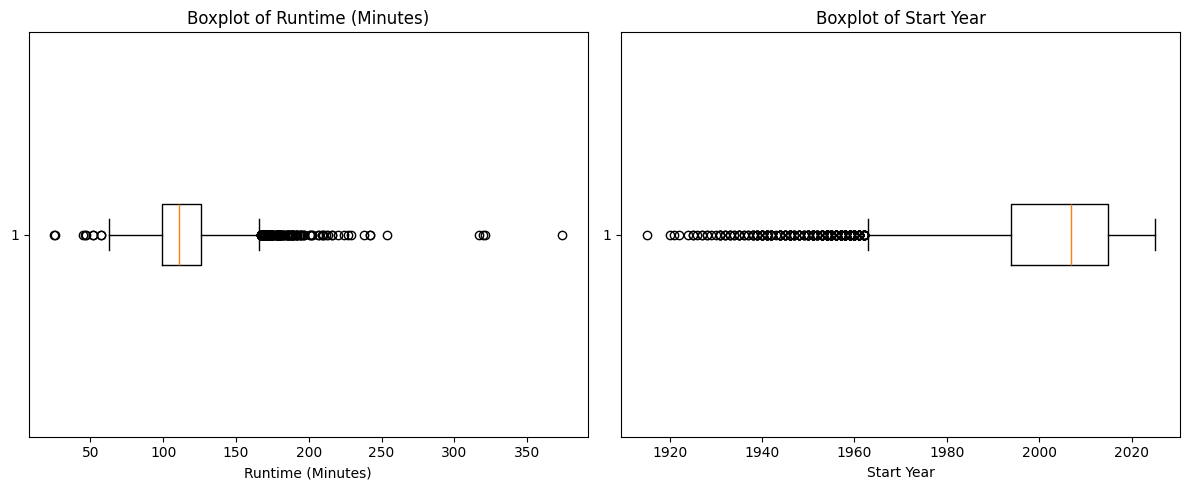

Lowest 5 runtimes:
                         primaryTitle  runtimeMinutes
411         A Charlie Brown Christmas              25
297   How the Grinch Stole Christmas!              26
406                      Sherlock Jr.              45
1883              The Garden of Words              46
755    Rudolph the Red-Nosed Reindeer              47

Highest 5 runtimes:
            primaryTitle  runtimeMinutes
420    The Best of Youth             374
282   Gangs of Wasseypur             321
2669           Cleopatra             320
1635                1900             317
1604          Gettysburg             254

Oldest 5 start years:
                         primaryTitle  startYear
4757            The Birth of a Nation       1915
529       The Cabinet of Dr. Caligari       1920
272                           The Kid       1921
679   Nosferatu: A Symphony of Horror       1922
406                      Sherlock Jr.       1924


In [33]:
# Assuming your DataFrame is named df
# Replace with actual DataFrame name if needed
df = df.copy()

# Ensure correct types
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')
df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')

# Drop rows with missing values in these columns
df_clean = df.dropna(subset=['runtimeMinutes', 'startYear'])

# Boxplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df_clean['runtimeMinutes'], vert=False)
plt.title('Boxplot of Runtime (Minutes)')
plt.xlabel('Runtime (Minutes)')

plt.subplot(1, 2, 2)
plt.boxplot(df_clean['startYear'], vert=False)
plt.title('Boxplot of Start Year')
plt.xlabel('Start Year')

plt.tight_layout()
plt.show()

# Print 5 lowest and 5 highest for each
print("Lowest 5 runtimes:")
print(df_clean[['primaryTitle', 'runtimeMinutes']].sort_values(by='runtimeMinutes').head(5))

print("\nHighest 5 runtimes:")
print(df_clean[['primaryTitle', 'runtimeMinutes']].sort_values(by='runtimeMinutes', ascending=False).head(5))

print("\nOldest 5 start years:")
print(df_clean[['primaryTitle', 'startYear']].sort_values(by='startYear').head(5))

---

### The outliers somewhat speak for themselves with the majority of runtime outliers being higher than average and the majority of start year outliers being below average, there is at least visually a lot of outliers but it may just be a product of it being 5000 sample size

---

# Conclusion

Overall the project went pretty well, we were able to answer our major and minor questions, we also found many outliers and unusual pieces of data that could be used to identify undersaturated markets or less widely popular ideas in film making, we also discovered a lack of strong correlations in the numerical data implying that no one statistic is likely to make your movie popular across all audiences, and instead aiming for appproximately average in many measured variables would be a more consistent method to get a widely popular movie that resonates well with different kinds of audiences

---